In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as pl

In [2]:
def shc(im):
    # The important part - Correct BGR to RGB channel
    im_ = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    pl.figure(figsize = (30,30))
    pl.imshow(im_)
    
def sh(im):
    pl.figure(figsize = (30,30))
    pl.imshow(im, cmap='gray')

In [3]:
img = cv2.imread('../data/own/Portulaca_flower_Counting/IMG_20190708_084245.jpg')
img = cv2.GaussianBlur(img,(5,5),0)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

## Binary Thresholdong

In [4]:
# ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [5]:
# sh(thresh)

## Color Thresholding

In [15]:
# define the list of boundaries
yellow = ([0, 200, 200], [100, 255, 255])
pink = ([80, 0, 150], [130, 100, 255])

In [16]:
def color_threshold(image, xx):
    lower, upper = xx
    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
 
    # find the colors within the specified boundaries and apply
    # the mask
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output

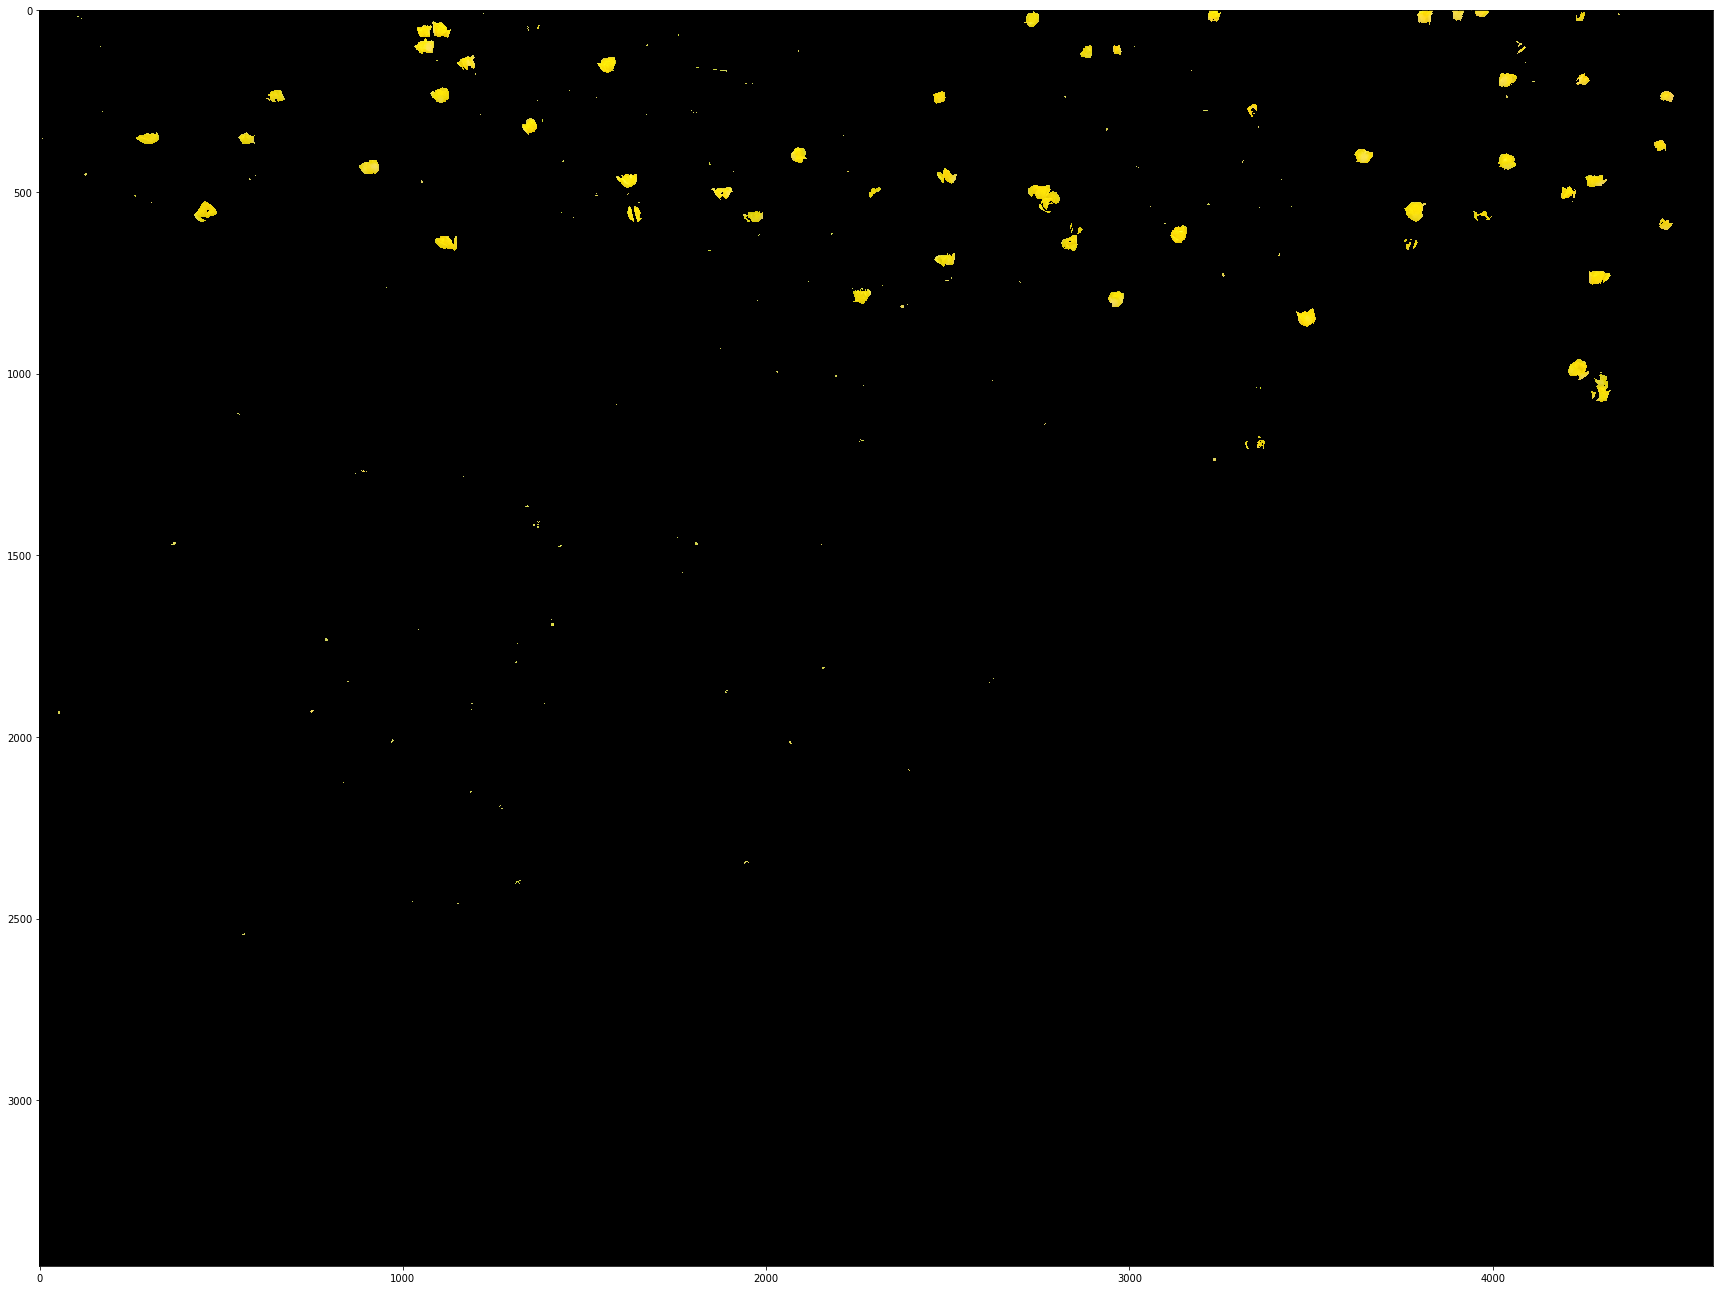

In [18]:
out = color_threshold(img, yellow)
shc(out)

In [21]:
gray = cv2.cvtColor(out,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [25]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 10)

In [26]:
# sh(opening)

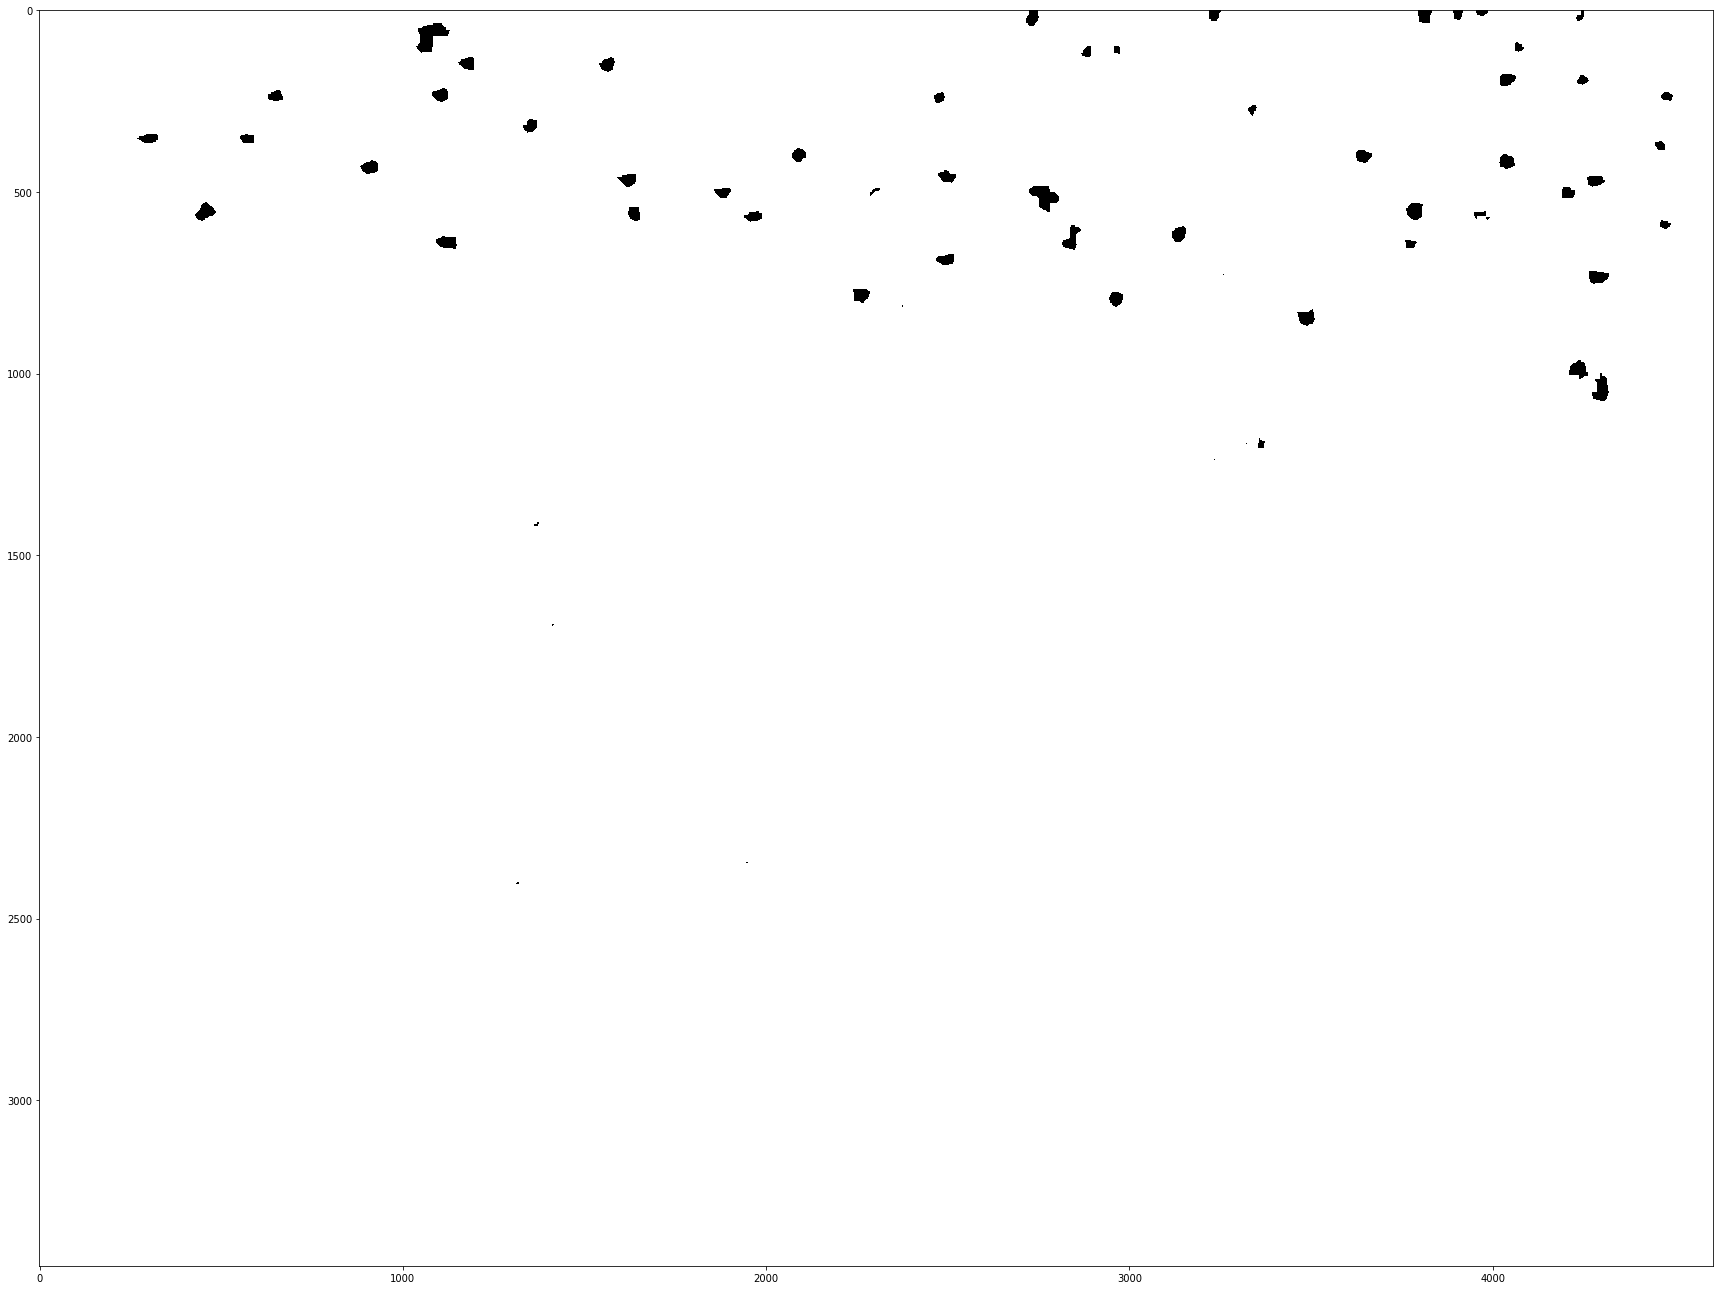

In [27]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
sure_bg = cv2.erode(sure_bg,kernel,iterations=1)
sh(sure_bg)

In [28]:
image, contours, hierarchy = cv2.findContours(sure_bg,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [31]:
img_counters = cv2.drawContours(img, contours, -1, (0,0,255), 5)

In [ ]:
shc(img_counters)